## Importing all the necessary libraries

In [1]:
import numpy as np
import os
import string
import matplotlib.pyplot as plt
import pandas as pd
import sys
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

### The dataset is downloaded from http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups
### We will create two elements:
### - X that will contain the file name followed by the text (document, text)
### - Y that will contian the category of the newsgroup corresponding to X

In [2]:
X = []          #(doc_name, text_of_doc)
Y = []           #(newsgroup_category)

#now going through each category
for category in os.listdir('20_newsgroups'):
    for document in os.listdir('20_newsgroups/' + category) :                  #going through each document
         with open('20_newsgroups/' + category + '/' + document, "r") as f:        #to read the contents of the document
                X.append((document, f.read()))                                  #consists of document followed by contents
                Y.append(category)                                            #storing the category corresponding to that datapoint
    

### Splitting the data into train and test

In [3]:
from sklearn import model_selection

# taking test size as 25% and random state as 0
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)

### Storing a list of stopwords that will be eliminated from the contents of X

In [4]:
#stop_words are words that are present in all kinds of categories
stop_words = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together','too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

### Creating a vocabulary
This will contain all the common words that appear in a category.
<br> Stop_words would not be put in them

In [5]:
def vocabulary(documents, stopwords) :  #to create vocab from all documents excluding stopwords
    
    vocab = {}  # empty dictionary 
    for i in range(len(documents)) :  # traversing through all documents 
        current_doc = documents[i][1]  # creating key for each document
        for current_word in current_doc.split() :  # traversing throgh all words in each document.
            word = current_word.strip(string.punctuation).lower()  
            if (word in stopwords or len(word)<2):  # stopword condition
                continue
            else:
                vocab[word] = vocab.get(word, 0) + 1  # frequency of the word
                
    return vocab

In [6]:
# vocabulary containing all unique words with their frequency

vocab = vocabulary(X_train, stop_words)

vocab

{'xref': 4566,
 'cantaloupe.srv.cs.cmu.edu': 4558,
 'talk.politics.guns:54393': 2,
 'talk.politics.misc:178727': 2,
 'soc.culture.jewish:63156': 2,
 'newsgroups': 15278,
 'talk.politics.guns,talk.politics.misc,soc.culture.jewish': 13,
 'path': 15246,
 'cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!bogus.sura.net!darwin.sura.net!sgiblab!wetware!spunky.redbrick.com!psinntp!psinntp!bony1!billg': 2,
 'billg@bony1.bony.com': 10,
 'gripp': 10,
 'subject': 16224,
 "who's": 355,
 'mormons': 364,
 'jews': 1221,
 'message-id': 15051,
 'c5ski7.df4@bony1.bony.com': 6,
 'organization': 14770,
 'la&w': 3,
 'rr': 33,
 'references': 9745,
 '1qvfik$6rf@usenet.ins.cwru.edu': 89,
 '1993apr20.003522.22480@midway.uchicago.edu': 20,
 '1993apr20.054839.14002@ucsu.colorado.edu': 14,
 '1r1118$4vs@terminator.rs.itd.umich.edu': 11,
 'date': 15558,
 'tue': 1721,
 '20': 2930,
 'apr': 14784,
 '1993': 11104,
 '16:58:55': 3,
 'gmt': 13305,
 'lines': 15659,
 '19': 1736,
 'article':

## Now evaluating the number of words that would act as features

In [7]:
# converting vocabulary values i.e frequencies in numpy array

np_vocab = np.array(list(vocab.values()))

np_vocab

array([4566, 4558,    2, ...,    1,    1,    1])

#### Here, finding the count of the words who have same frequency in vocabulary
for instance there are 134634 words which appear only once in the all the documents combined together.

In [8]:
freq, counts = np.unique(np_vocab, return_counts = True)  # finding unique values in vocab and returning their count.
print(freq, counts)

[    1     2     3 ... 15558 15659 16224] [134634  31540  13288 ...      1      1      1]


### now plotting a graph between frequency of a word and their count
<br> Take the X axis to be 1 to 100 representing frequency of word and Y axis to be 0 to 1800 showing count of such words as this will give the curve that we require and this will eliminate the presence of the outliers
<br> Here we will take those words as the features that have frequency greater than 80

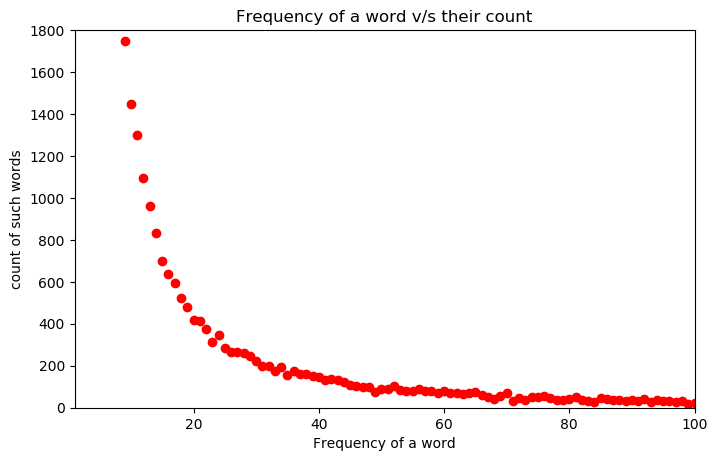

In [37]:
plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green')
plt.scatter(freq, counts, color = 'red')
plt.axis([1, 100, 0, 1800])  # taking this axis to remove outliers in order to get the curve we wanted.
plt.title('Frequency of a word v/s their count')
plt.xlabel('Frequency of a word')
plt.ylabel('count of such words')
plt.show()

In [10]:
cutoff_freq = 80
# For deciding cutoff frequency
# finding number of such words
num_words_above_cutoff = len(np_vocab[np_vocab > cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)

Number of words with frequency higher than cutoff frequency(80) : 4197


In [11]:
# Words with frequency higher than cutoff frequency are chosen as features
# (i.e we remove words with low frequencies as they would not be significant )

features = []
for key in vocab:
    if vocab[key] >=cutoff_freq: # comparing freq of each worf in vocab to cutoff freq.
        features.append(key)

### Since, 4197 features as seen above will take a lot of time in running codes
### So, let us take the top 1000 words with most frequency in order to save time and simultaneously have good amount of features to give decent accuracy
### But, in order to get best accuracy we will only take the features out of the above 4197 features having frequency > 80

In [12]:
# sorting the vicab dict an taking its top 1000 key value pairs

sorted_top_1000_vocab = sorted(vocab.items(), key = lambda kv:kv[1], reverse = True)[:1000]

In [13]:
# making a list of features i.e top 1000 words acc to frequency

top_1000_features = []
for i in sorted_top_1000_vocab: # going through dictionary keys
    top_1000_features.append(i[0])

### Now converting the data into a 2D array with words as the features from each document
We will now represent training data as word vector counts. This may take some time as nested looping is taking place which will have a time complexity of n^2 (n square).

In [14]:
def create_2D_X(data, features) :
    
    data_2D = np.zeros((len(data), len(features)))  # firsty making a zero array of same size as of data
    
    for i in range(len(data)) : # looping through each document
        current_doc = data[i][1]  # finding current document
        for current_word in current_doc.split() :  #going through each word in the training document
            word = current_word.strip(string.punctuation).lower()
            
            if word in features:  # if that word is in our selected features them add count of them else leave them
                data_2D[i][features.index(word)] += 1
    return data_2D

In [15]:
# training x data i.e this is our x_train

training_x_data = create_2D_X(X_train, top_1000_features)

In [16]:
training_x_data

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 2., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [17]:
#similarly converting the testing data
testing_x_data = create_2D_X(X_test, top_1000_features)

In [18]:
len(testing_x_data[0])

1000

### Converting string valued Y_train to numeric format
Comparisons in strings can't be done easily to get boolean arrays directly for boolean indexing
<br>hence converting them to int

In [19]:
# Making a dictionary which will store the string as key and the number rep that string as value

numeric = {}
_Y_train = [] # this list contains updated y_train in int format

for i in range(1, len(set(Y_train)) + 1) : # making the range from 1 to the number of unique classes in output
    numeric[list(set(Y_train))[i-1]] = i

for i in range(len(Y_train)):
    _Y_train.append(numeric[Y_train[i]])
    
_Y_train

[5,
 14,
 18,
 11,
 18,
 13,
 9,
 3,
 6,
 16,
 14,
 5,
 16,
 4,
 17,
 9,
 16,
 19,
 5,
 5,
 16,
 9,
 17,
 4,
 7,
 20,
 11,
 8,
 17,
 11,
 1,
 20,
 20,
 5,
 5,
 15,
 16,
 2,
 19,
 2,
 18,
 17,
 19,
 8,
 15,
 4,
 2,
 10,
 2,
 13,
 4,
 20,
 12,
 3,
 8,
 20,
 1,
 7,
 3,
 16,
 11,
 12,
 7,
 3,
 10,
 11,
 17,
 16,
 5,
 7,
 8,
 2,
 2,
 1,
 1,
 8,
 2,
 6,
 3,
 15,
 17,
 7,
 12,
 12,
 19,
 11,
 7,
 17,
 18,
 16,
 9,
 16,
 17,
 2,
 6,
 5,
 16,
 10,
 8,
 16,
 10,
 1,
 4,
 2,
 15,
 13,
 9,
 18,
 18,
 18,
 4,
 6,
 15,
 7,
 17,
 10,
 14,
 12,
 16,
 5,
 16,
 13,
 18,
 6,
 19,
 9,
 16,
 5,
 2,
 1,
 15,
 6,
 16,
 9,
 5,
 8,
 6,
 7,
 12,
 10,
 5,
 8,
 9,
 5,
 7,
 14,
 12,
 17,
 10,
 17,
 9,
 1,
 9,
 2,
 5,
 17,
 9,
 7,
 5,
 14,
 16,
 19,
 8,
 20,
 12,
 14,
 3,
 9,
 2,
 1,
 19,
 13,
 7,
 18,
 8,
 4,
 17,
 3,
 9,
 8,
 10,
 20,
 14,
 1,
 1,
 20,
 14,
 11,
 16,
 19,
 19,
 16,
 13,
 16,
 6,
 9,
 9,
 2,
 12,
 15,
 5,
 13,
 8,
 7,
 18,
 5,
 10,
 12,
 11,
 3,
 18,
 2,
 5,
 11,
 14,
 15,
 12,
 10,
 17,
 15,
 10,

### Converting the x_train and y_train into a DataFrame
This will make the comparisons for making boolean indexing easy

In [20]:
def convert_to_pd(data) :

    pd_data = pd.DataFrame(data)
    
    return pd_data

In [21]:
# input training data

pd_x_train = convert_to_pd(training_x_data)

pd_x_train

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14993,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14994,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
# output training data

pd_y_train = convert_to_pd(_Y_train)

pd_y_train

,0
0,5
1,14
2,18
3,11
4,18
...,...
14992,4
14993,14
14994,1
14995,3


## Implementing Multinomial Navie Bayes from Scratch
Now, we will define our own fit function along with probability, predict functions. They will take time to complete because of n^2 time complexity.

## Fit function -
Takes x_train and y_train in pandas dataframe format and returns the dictionary that is used to further calculate probabilities in the predict fn.

Top level dict keys are the unique classes, 2nd level keys are the features and the total counts and sum of frequencies in each class.

In [23]:
# this function is to train algorithm over training data    
# we have in this dict count of data of particular class and the count of data of particular class-feature-feature-label
# also will have total count of training data that we have

def fit(x_train, y_train) :
    
    counts = {}  #we will use dictionary and create nested dictionary where needed
    class_values = set(y_train[0]) # finding distinct possible values of o/p

    for current_class in class_values :  # going through all possible classes
        counts[current_class] = {}  # this dict will have all possible features 
        counts["total_data"] = len(y_train)  # at the top level storing count of total data
        
        current_class_rows = (current_class == y_train)[0]  # this will give a true false np array 
        x_train_current = x_train[current_class_rows]  # give those rows for this particular class
        y_train_current = y_train[current_class_rows]
        num_features = x_train.shape[1]  # finding number of features
        counts[current_class]["total_class_count"] = len(y_train_current)  # This will give number of rows for current class
        counts[current_class]["total_count"] = 0 # initializing to be 0
        
        for j in range(1, num_features + 1) :  # going through each feature from 1 to nth feature hence, 1 to n+1
            
            counts[current_class][j] = np.sum(x_train_current[j-1])  # finding sum of all the rows for current class and feature
            
            # finding sum of values in all features in curent class
            counts[current_class]["total_count"] += np.sum(x_train_current[j-1])  
    
    return counts # returning the dictionary

## Functions Used for Prediction -
<br> Probability function With Laplace Correction
<br> What is the prob that x i.e. a single data pt, belongs to a the current class

<br> Taking Log probabilities to get rid of situation where multiplication lead to making values 0.

<br> Now, this probability has 2 components

<br> 1) What is prob - p(y == current_class)

<br> take output as this above prob

<br> Now Finding prob for each individual feature(i.e word) and keep multiplying to the output

<br> 2) Find prob for all possible featurs for given data point features

<br> In this probability function , for each feature i.e for each word the probability is calculated by dividing the freq <br> of jth word in the current class and sum of freq of all words in current class
<br> Now, this whole is multiplied to the word frequency of the word we are tring to find prob for.
<br> Multiplied with x[j] as we have taken vector counts i.e the frequency and not just 0 or 1 rep. that the doc cotains it <br> or not But here, we have taken the value that how many times it is coming hence multiplied with x[j]

In [24]:
def probability(dictionary, x, current_class):
    
    # finding 1st component , called as prior/class probability i.e. p(y == current_class)
    # dictionary[current_class]["total_class_count"] gives num of data points belonging to current class
    # dictionary["total_data"] gives total num of training data points
    
    output = np.log(dictionary[current_class]["total_class_count"]) - np.log(dictionary["total_data"])
    num_features = len(x)

    for j in range(num_features):  # going through each word i.e features
        
        count_current_class_with_value_xj = dictionary[current_class][j+1] + 1 # freq of jth feature & +1 for laplace correction
        count_current_class = dictionary[current_class]["total_count"] + num_features # denominator 
        
        current_xj_probablity = x[j]*(np.log(dictionary[current_class][j+1] + 1) - np.log(count_current_class)) #calc log prob
        output += current_xj_probablity  # multiplication converted to addition because of log probabilities
    
    return output

In [25]:
# predicting class of single test data point

def predictSinglePoint(dictionary, x):
    
    # finding all possible classes
    classes = dictionary.keys()  # as at top level in dict we had all possible classes
    
    # initialising the values of best class and prob
    best_p = None
    best_class = None
    first_run = True  # so, now,the algo update these values defenitely in first run
    
    for current_class in classes: # going through each class 
        if (current_class == "total_data"):
            continue  # skip this iteration for total data key
            
        # calling fn which calc the prob for us
        # gives the prob that this x belongs to this current class 
        
        p_current_class = probability(dictionary, x, current_class)
        
        # finding best class and prob.
        if (first_run) or (p_current_class > best_p):
            best_p = p_current_class  
            best_class = current_class
            first_run = False
    
    return best_class  # returning best class for this x data point

we'll call the fit fn which will give the dictionary and then we'll have a predict fn which will take the dict and will take the testing data

For testing data we are supposed to predict the classes and return that another array

In [26]:
def predict(dictionary, X_test):
    y_pred = []  # an empty array to start with
    for x in X_test:  # going through the testing data 
        
        # calling the fn which will give us the prediction for the single data point in x_class
        x_class = predictSinglePoint(dictionary, x)
        y_pred.append(x_class)
    return y_pred

In [27]:
# calling fit function to train our classifier by using pandas dataframe of x_train and y_train
# this will give the dictionary containing the required values 

dictionary = fit(pd_x_train,pd_y_train)

In [28]:
# calling predict fn which will take dictionary and testing data in 2-D array format 
# this will give array of the predicted classes in the numeric form as we converted earlier.

y_pred = predict(dictionary, testing_x_data)

#### Converting the Integer Values of the Predctions output back to the String values using the dictionary numeric that we made while converting string to integer

In [29]:
Y_pred = []  # this list will contain the string values
for i in y_pred:  # now going through each numeric value in y_pred
    
    # finding the corresponding key value in the dictionary that will be string values
    Y_pred.append(list(numeric.keys())[list(numeric.values()).index(i)])  

Y_pred

['comp.windows.x',
 'sci.med',
 'talk.politics.guns',
 'misc.forsale',
 'rec.sport.hockey',
 'talk.religion.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.ibm.pc.hardware',
 'rec.autos',
 'comp.graphics',
 'talk.politics.guns',
 'comp.sys.mac.hardware',
 'talk.politics.guns',
 'soc.religion.christian',
 'rec.sport.hockey',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.ibm.pc.hardware',
 'sci.electronics',
 'comp.os.ms-windows.misc',
 'talk.politics.guns',
 'talk.politics.guns',
 'misc.forsale',
 'alt.atheism',
 'rec.sport.baseball',
 'sci.electronics',
 'comp.sys.mac.hardware',
 'comp.sys.mac.hardware',
 'sci.crypt',
 'sci.med',
 'sci.crypt',
 'sci.space',
 'misc.forsale',
 'soc.religion.christian',
 'sci.med',
 'soc.religion.christian',
 'comp.sys.mac.hardware',
 'talk.religion.misc',
 'sci.med',
 'rec.sport.baseball',
 'rec.motorcycles',
 'soc.religion.christian',
 'comp.os.ms-windows.misc',
 'talk.politics.mideast',
 'sci.space',
 'comp.sys.mac.hardware',
 'talk.politics.mideast',
 'sci.m

#### Now we are making a comparison between the Multinomial Naive Bayes that we wrote from scratch and the inbuilt Multinomial Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test,Y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.72      0.77      0.74       233
           comp.graphics       0.81      0.77      0.79       253
 comp.os.ms-windows.misc       0.90      0.80      0.85       249
comp.sys.ibm.pc.hardware       0.82      0.83      0.82       240
   comp.sys.mac.hardware       0.82      0.90      0.85       236
          comp.windows.x       0.91      0.84      0.87       240
            misc.forsale       0.67      0.84      0.75       261
               rec.autos       0.84      0.90      0.87       269
         rec.motorcycles       0.83      0.93      0.88       284
      rec.sport.baseball       0.90      0.96      0.93       248
        rec.sport.hockey       0.96      0.91      0.94       231
               sci.crypt       0.94      0.85      0.89       233
         sci.electronics       0.78      0.84      0.81       244
                 sci.med       0.78      0.85      0.81       256
         

### Implementing using sklearn's inbuilt Multinomial Naive Bayes
Printing the classification report and confusion matrix to compare result of code written from scratch and the inbuilt funciton.

In [31]:
# Using sklearn's Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

clf = MultinomialNB() 
clf.fit(training_x_data, Y_train)  # fitting using input data in 2-D array form.
Y_test_pred = clf.predict(testing_x_data)
sklearn_score_train = clf.score(training_x_data, Y_train)  # finding score on training data
print("Sklearn's score on training data :", sklearn_score_train) 
sklearn_score_test = clf.score(testing_x_data, Y_test)  # finding score on testing data
print("Sklearn's score on testing data :", sklearn_score_test)
print("Classification report for testing data :-") 
print(classification_report(Y_test, Y_test_pred))  # finding classification report
print(confusion_matrix(Y_test, Y_test_pred))  # finding confusion matrix

Sklearn's score on training data : 0.8465026338601054
Sklearn's score on testing data : 0.8148
Classification report for testing data :-
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.77      0.74       233
           comp.graphics       0.81      0.77      0.79       253
 comp.os.ms-windows.misc       0.90      0.80      0.85       249
comp.sys.ibm.pc.hardware       0.82      0.83      0.82       240
   comp.sys.mac.hardware       0.82      0.90      0.85       236
          comp.windows.x       0.91      0.84      0.87       240
            misc.forsale       0.67      0.84      0.75       261
               rec.autos       0.84      0.90      0.87       269
         rec.motorcycles       0.83      0.93      0.88       284
      rec.sport.baseball       0.90      0.96      0.93       248
        rec.sport.hockey       0.96      0.91      0.94       231
               sci.crypt       0.94      0.85      0.89       233
    

## It is clear from the confusion matrix and classification report that the predictions come out to be exactly same as of the sklearn inbuilt Multinomial Naive Bayes classifier.
That also supports the correctness of our code. However, our code a very long time to run.